# Linear Regression
__~ Anish Sachdeva__

$ x_1 x_2 x_3 .. x_m $  --> $y_1 y_2 y_3 ... y_m$


x --> y



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("Linear_X_Train.csv").values
Y = pd.read_csv("Linear_Y_Train.csv").values

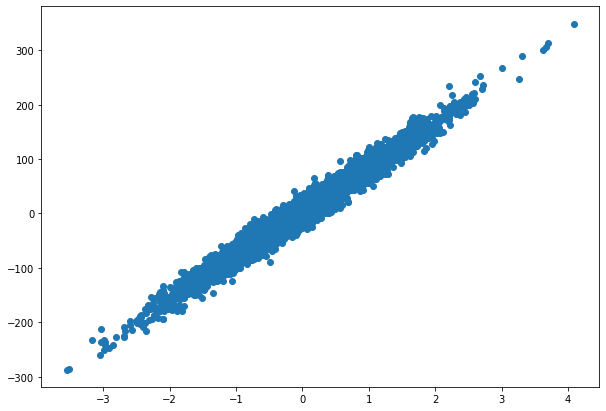

In [3]:
plt.figure(figsize=(10, 7))
plt.scatter(X, Y)
plt.show()

In [4]:
X

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [5]:
X.shape

(3750, 1)

In [6]:
Y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [7]:
Y.shape

(3750, 1)

## Cost Function
__m__ = No. of points

$$
f(x_i) = \theta_0 + \theta_1 x_i
$$

$$
J_{\theta}(x)  = \frac{1}{m} \Sigma (f(x_i) - y_i) ^2
$$

$$
$$

# Normalise Data

$$
\mu = \bar{X} \\
\sigma = std(X)
$$

In [8]:
mu = X.mean()
sigma = X.std()
X = (X - mu) / sigma
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

In [10]:
sigma

0.9920801322508517

# Linear Regression

In [9]:
def hypothesis(theta, x):
    return theta[0] + theta[1] * x

In [10]:
hypothesis([0, 2], np.array([1, 2, 3]))

array([2, 4, 6])

The cost function is defined as 
$$
J_{\theta}(x) = \frac{1}{m} \Sigma (h_{\theta}(x_i) - y_i) ^2
$$

$$
J_{\theta}(x) = \frac{1}{m} \Sigma |h_{\theta}(x_i) - y_i|
$$

In [11]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

In [12]:
X.shape

(3750, 1)

In [13]:
Y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [14]:
Y.shape

(3750, 1)

In [15]:
# cost function
def error(theta, X, Y):
    err = 0
    m, _ = X.shape # number of entries
    
    for i in range(m):
        err += (hypothesis(theta, X[i]) - Y[i]) ** 2
        
    return err / m

In [16]:
((hypothesis([0, 200/3], X) - Y) ** 2).sum() / X.shape[0]

366.69623790640964

In [17]:
X.shape[0]

3750

In [20]:
# vectorized
def error_advanced(theta, X, Y):
    return ((hypothesis(theta, X) - Y) ** 2).mean()

In [18]:
error([1, 2], X, Y)

array([6260.35936676])

In [21]:
error_advanced([1, 2], X, Y)

6260.359366755907

The Gradient of the hypothesis is defined as 
$$
\frac{\delta J_{\theta}(x)}{\delta \theta_{0}} = \frac{1}{m} \Sigma (f_{\theta}(x_i) - y_i)
$$

$$
\frac{\delta J_{\theta}(x)}{\delta \theta_{1}} = \frac{1}{m} \Sigma (f_{\theta}(x_i) - y_i) \cdot x_i
$$

In [22]:
# iterative
def gradient(theta, X, Y):
    m, _ = X.shape
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(theta, X[i])
        grad[0] += hx -Y[i]
        grad[1] += (hx - Y[i]) * X[i]
        
    # return [dJ/dtheta_0    dJ/ d theta_1]
    return grad / m

In [23]:
gradient([0, 0], X, Y)

array([ -0.68386897, -79.90573694])

In [24]:
((hypothesis([0, 0], X) - Y) * X).sum() / 3750

-79.9057369424998

In [25]:
# vectorized
def gradient_vectorized(theta, X, Y):
    f = hypothesis(theta, X)
    grad = np.zeros(2,)
    grad[0] = (f - Y).mean()
    grad[1] = ((f - Y) * X).mean()
    return grad

In [26]:
f = hypothesis([100, 100], X)
f

array([[ 74.6479395 ],
       [ 44.45862262],
       [207.3806558 ],
       ...,
       [ 73.04965737],
       [272.73076217],
       [ 54.24133985]])

In [27]:
Y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [28]:
((f - Y) * X).sum() / X.shape[0]

20.09426305750022

In [29]:
gradient([1, 2], X, Y)

array([  0.31613103, -77.90573694])

In [30]:
gradient_vectorized([1, 2], X, Y)

array([  0.31613103, -77.90573694])

In [40]:
def gradient_descent(X, Y, alpha=0.1, max_itr=100):
    m, _ = X.shape
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_itr):
        err = error_advanced(theta, X, Y) # cost
        error_list.append(err)
        theta_list.append((theta[0], theta[1]))
        # learn
        theta -= alpha * gradient_vectorized(theta, X, Y)
        if i % 200 == 0:
            print(f'Iteration no {i}, cost of the parameters are {err}')
        
    return theta, theta_list, error_list

In [46]:
# training our parameters on our data
theta, theta_list, error_list = gradient_descent(X, Y, max_itr=1000, alpha=1)

Iteration no 0, cost of the parameters are 6576.350052461936
Iteration no 200, cost of the parameters are 190.95557937254713
Iteration no 400, cost of the parameters are 190.95557937254713
Iteration no 600, cost of the parameters are 190.95557937254713
Iteration no 800, cost of the parameters are 190.95557937254713


In [47]:
theta

array([ 0.68386897, 79.90573694])

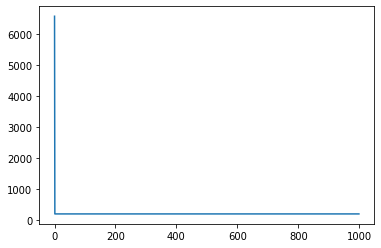

In [48]:
plt.plot(error_list)

In [59]:
Y_pred = hypothesis(theta, X)
Y_pred

array([[-19.57388181],
       [-43.69687794],
       [ 86.48717332],
       ...,
       [-20.85100092],
       [138.7056574 ],
       [-35.87992564]])

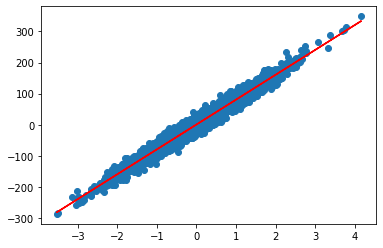

In [60]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [64]:
hypothesis(theta, 5)

400.21255368051453

# Predict for New Datafor X_test

In [65]:
X_test = pd.read_csv("Linear_X_test.csv").values

In [66]:
# normalizing the data
X_test = (X_test - mu) / sigma

In [67]:
X_test

array([[-1.85483984],
       [-0.8378731 ],
       [-2.51228473],
       ...,
       [ 0.1671261 ],
       [-0.24216081],
       [-0.64776095]])

In [68]:
Y_pred = hypothesis(theta, X_test)

In [69]:
Y_pred

array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [45]:
df = pd.DataFrame(data=Y_pred, columns=['y'])
df.to_csv("ans.csv", index=False)

# Evaluation

In [70]:
def evaluate(Y_actual, Y_pred):
    num = ((Y_actual - Y_pred) ** 2).sum()
    denom = ((Y_actual - Y_actual.mean()) ** 2).sum()
    
    return (1 - (num / denom)) * 100

In [71]:
evaluate(hypothesis(theta, X), Y)

97.00927535328225

## Scikit -Learn Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(X, Y)

LinearRegression()

In [75]:
Y_pred = model.predict(X)
Y_pred

array([[-19.57388181],
       [-43.69687794],
       [ 86.48717332],
       ...,
       [-20.85100092],
       [138.7056574 ],
       [-35.87992564]])

In [76]:
model.score(X, Y)

0.9709612233822353